# Outliers

- An Outlier is an observation in a given dataset that lies far from the rest of the observations. That means an outlier is vastly larger or smaller than the remaining values in the set.
- An outlier may occur due to the variability in the data, or due to experimental error/human error.

- They may indicate an experimental error or heavy skewness in the data(heavy-tailed distribution).

- **Detecting Outliers**

- Below are some of the techniques of detecting outliers

1. Boxplots
2. Z-score
3. Inter Quantile Range(IQR)

#### Which Machine Learning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM--------                Not Sensitive To Outliers          
3. Linear Regression----------  Sensitive To Outliers
4. Logistic Regression-------   Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive 
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive 
10. PCA-------------------------- very very Sensitive 
11. Neural Networks-------------- Sensitive
12. DBSCAN -----------------------Sensitive

- **if data set has outliers and data is imbalanced, don't select algorithm directly which are sensitive**

# Detecting Outliers

In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [247]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [248]:
df.shape

(891, 12)

In [249]:
df['Age'].isnull().sum()

177

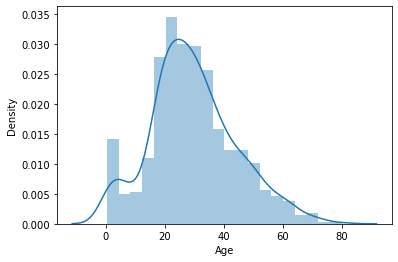

In [250]:
sns.distplot(df['Age'].dropna());

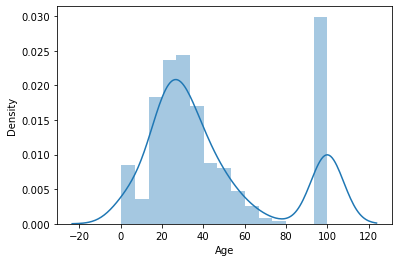

In [251]:
sns.distplot(df['Age'].fillna(100));

### Gaussian Distributed Data

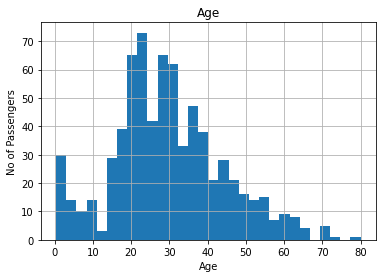

In [252]:
figure=df.Age.hist(bins=30)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passengers');

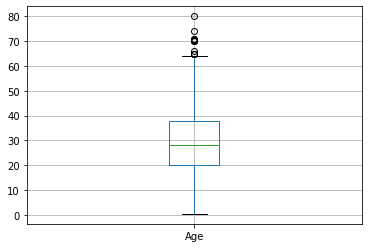

In [253]:
figure=df.boxplot(column='Age')

In [237]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Standard Deviation Method

In [254]:
upper_bound=df['Age'].mean()+3*df['Age'].std()
lower_bound=df['Age'].mean()-3*df['Age'].std()
print(upper_bound)
print(lower_bound)
print(df['Age'].mean())

73.27860964406095
-13.88037434994331
29.69911764705882


In [259]:
outliers=[]
def detect_outliers(df):
    mean = np.mean(df)
    std = np.std(df)
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    for n in df:
        if (n<lower_limit or n>upper_limit):
            outliers.append(n)
    return outliers
outliers = detect_outliers(df['Age'])
print("Outliers : \n", outliers)
print('\nNo.of outliers in "Age":',len(outliers))

Outliers : 
 [80.0, 74.0]

No.of outliers in "Age": 2


### Skewed Data

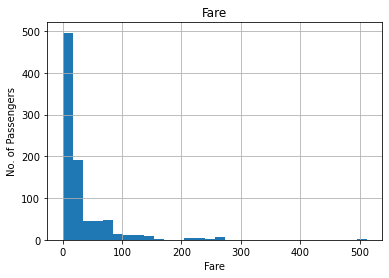

In [263]:
figure=df['Fare'].hist(bins=30)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passengers');

In [224]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### IQR Method

**steps:**
- Sort the dataset in ascending order
- calculate the 1st and 3rd quartiles(Q1, Q3)
- compute IQR=Q3-Q1
- compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)
- loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers

In [264]:
outliers=[]
def detect_outliers(df):
    df=sorted(df)
    Q1 = np.percentile(df,25)
    Q3 = np.percentile(df,75)
    IQR = Q3 - Q1
    upper_limit=Q3 + (1.5 * IQR)
    lower_limit=Q1 - (1.5 * IQR)
    for n in df:
        if (n<lower_limit or n>upper_limit):
            outliers.append(n)
    return outliers
outliers = detect_outliers(df['Fare'])
print("Outliers : \n", outliers)
print('\nNo.of outliers in "Fare":',len(outliers))

Outliers : 
 [66.6, 66.6, 69.3, 69.3, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 71.0, 71.0, 71.2833, 73.5, 73.5, 73.5, 73.5, 73.5, 75.25, 76.2917, 76.7292, 76.7292, 76.7292, 77.2875, 77.2875, 77.9583, 77.9583, 77.9583, 78.2667, 78.2667, 78.85, 78.85, 79.2, 79.2, 79.2, 79.2, 79.65, 79.65, 79.65, 80.0, 80.0, 81.8583, 82.1708, 82.1708, 83.1583, 83.1583, 83.1583, 83.475, 83.475, 86.5, 86.5, 86.5, 89.1042, 89.1042, 90.0, 90.0, 90.0, 90.0, 91.0792, 91.0792, 93.5, 93.5, 106.425, 106.425, 108.9, 108.9, 110.8833, 110.8833, 110.8833, 110.8833, 113.275, 113.275, 113.275, 120.0, 120.0, 120.0, 120.0, 133.65, 133.65, 134.5, 134.5, 135.6333, 135.6333, 135.6333, 146.5208, 146.5208, 151.55, 151.55, 151.55, 151.55, 153.4625, 153.4625, 153.4625, 164.8667, 164.8667, 211.3375, 211.3375, 211.3375, 211.5, 221.7792, 227.525, 227.525, 227.525, 227.525, 247.5208, 247.5208, 262.375, 262.375, 263.0, 263.0, 263.0, 263.0, 512.3292, 512.3292, 512.3292]

No.of outliers in "Fare": 116


# Handling Outliers

### Trimming/Remove the outliers

- In this technique, we remove the outliers from the dataset. Although it is not a good practice to follow.

In [226]:
index = df[(df['Age'] >= upper_limit)|(df['Age'] <= lower_limit)].index
df.drop(index, inplace=True)

In [227]:
df.shape

(883, 12)

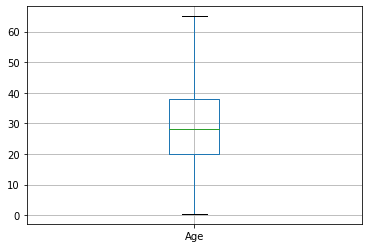

In [228]:
figure=df.boxplot(column='Age')

In [229]:
index = df[(df['Fare'] >= upper_limit)|(df['Fare'] <= lower_limit)].index
df.drop(index, inplace=True)

In [230]:
df.shape

(768, 12)

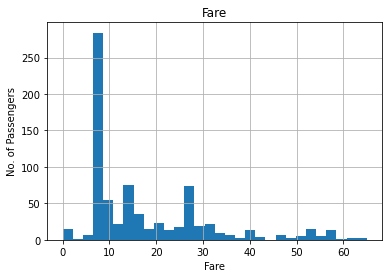

In [231]:
figure=df['Fare'].hist(bins=30)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passengers');

### Capping Outliers using IQR Ranges

- Trimming outliers altogether may result in the removal of a large number of records from your dataset which isn’t desirable in some cases since columns other than the ones containing the outlier values may contain useful information.

- In such cases, you can use outlier capping to replace the outlier values with a maximum or minimum capped values. Be warned, this manipulates your data, but here’s how you do it.

- Outlier values can be replaced by the upper and lower limit calculated using the IQR ranges

In [241]:
df["Age"] = np.where(df["Age"]> upper_limit, upper_limit,
                        np.where(df["Age"]< lower_limit, lower_limit,
                          df["Age"]))

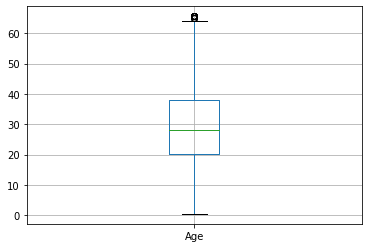

In [242]:
figure=df.boxplot(column='Age')

In [245]:
df["Fare"] = np.where(df["Fare"]> upper_limit, upper_limit,
                        np.where(df["Fare"]< lower_limit, lower_limit,
                          df["Fare"]))

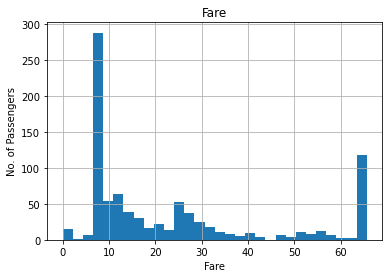

In [246]:
figure=df['Fare'].hist(bins=30)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passengers');

### Replacing Outliers with Median Values

- In this technique, we replace the extreme values with median values. It is advised to not use mean values as they are affected by outliers

In [258]:
median = (df['Age']).median()
median

28.0

In [261]:
df["Age"] = np.where(df["Age"]> upper_limit, median,
                        np.where(df["Age"]< lower_limit, median,
                        df["Age"]))

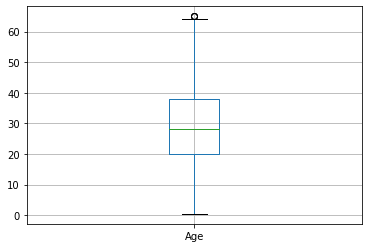

In [262]:
figure=df.boxplot(column='Age')

In [265]:
median = (df['Fare']).median()
median

14.4542

In [266]:
df["Fare"] = np.where(df["Fare"]> upper_limit, median,
                        np.where(df["Fare"]< lower_limit, median,
                        df["Fare"]))

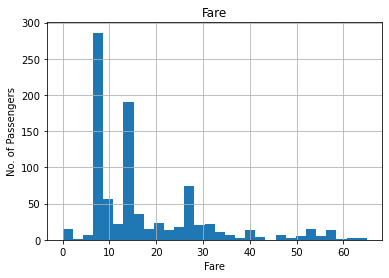

In [267]:
figure=df['Fare'].hist(bins=30)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passengers');